In [38]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [39]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(io.BytesIO(requests.get(URL).content), sep=",", encoding="unicode_escape")

In [40]:
data = df[["Rented Bike Count", "Rainfall(mm)", "Temperature(°C)"]].to_numpy().astype(np.float64)
x = np.hstack((data[:, 1:], data[:, 1:] @ np.array([3, 2]).reshape(-1, 1)))
y = data[:, 0]
desmat = np.hstack((x, np.ones((x.shape[0], 1))))

In [41]:
product = desmat.T @ desmat

gamma = 0
shifted_1 = product + gamma * np.linalg.norm(product)

gamma = 0.01
shifted_2 = product + gamma * np.linalg.norm(product)

print(f"Rank of shifted matrix (gamma = 0.00): {np.linalg.matrix_rank(shifted_1)}")
print(f"Rank of shifted matrix (gamma = 0.01): {np.linalg.matrix_rank(shifted_2)}")

Rank of shifted matrix (gamma = 0.00): 3
Rank of shifted matrix (gamma = 0.01): 4


In [42]:
desmat_indep = desmat[:, :-2]
desmat_indep = np.hstack((desmat_indep, np.ones((desmat_indep.shape[0], 1))))

In [43]:
def get_model_fit(desmat: np.ndarray, y: np.ndarray, gamma: float):
    shifted = desmat.T @ desmat + gamma * np.linalg.norm(desmat)**2
    beta = np.linalg.inv(shifted) @ desmat.T @ y
    return np.corrcoef(y, desmat @ beta)[0, 1]**2

In [44]:
gammas = np.linspace(0.0, 0.2, 50, endpoint=True)
dep = np.zeros_like(gammas)
indep = np.zeros_like(gammas)
for i, g in enumerate(gammas):
    dep[i] = get_model_fit(desmat, y, g)
    indep[i] = get_model_fit(desmat_indep, y, g)

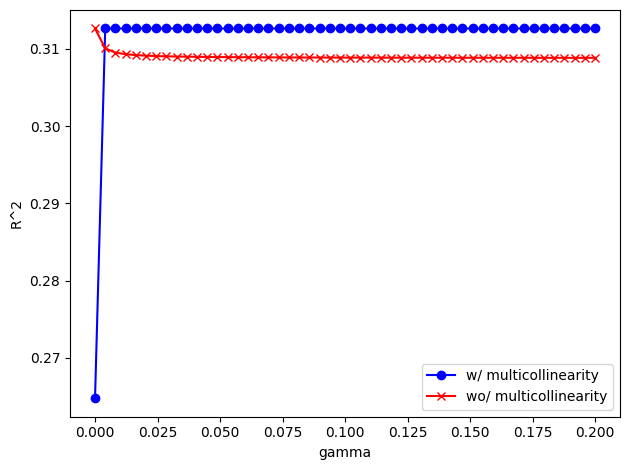

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel("gamma")
ax.set_ylabel("R^2")
ax.plot(gammas, dep, "bo-", label="w/ multicollinearity")
ax.plot(gammas, indep, "rx-", label="wo/ multicollinearity")
fig.tight_layout()
plt.legend()
plt.show()